In [1]:
# Setup time.  Import libraries, and pick some good colors
# that are easy to discern and look good together.  Also
# set up some universal values for the plots we're going to
# generate - easier to set them once here than tinker with 
# them all individually...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.stats import sem
import statistics

color1 = '#6359a6' # purple
color2 = '#bebada' # light purple
color3 = '#f94c39' # salmon
color4 = '#fca69c' # lightsalmon
color5 = '#8dd3c7' # teal
color6 = '#b8f5ea' # lightteal
color7 = '#fed9a6' # yellow
color8 = '#ffe8c9' # lightyellow

# *****TODO: I just figured out you can simplify this and/or make it more flexible/elegant using a cycler object.

colorlist=['#6359a6', '#f94c39', '#8dd3c7', '#fed9a6'] #just cycle thru colors
colorlist2alts=['#6359a6', '#bebada', '#f94c39', '#fca69c', '#8dd3c7', '#b8f5ea', '#fed9a6', '#ffe8c9'] #color, close relative, color 2, close relative, etc...
colorlist3alts=['#6359a6', '#837bbd', '#bebada', '#f94c39', '#ff8a7d', '#ffbab3', '#3bc4ad', '#7aebd8', '#b6fcf1', '#ffa11f', '#ffc16b', '#ffdcab'] #color, close relative, close relative, color 2, close relative, etc...

SMALL_SIZE = 14   # Defining font sizes
MEDIUM_SIZE = 22  # Defining font sizes
BIGGER_SIZE = 25  # Defining font sizes

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('legend', loc='upper left')

plt.rc('errorbar', capsize=0)            # size of caps on your error bars, in pixels (0=no caps)


In [3]:
# Google colab specific setup:  mount Google Drive for data ingest.
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

Setup Block - much of this is self-explanatory, and will change as I keep working on this.


In [2]:
setup_path = "C:/Users/Daniel.A.Phillips62/Documents/congressional/Jupyter/Data Analysis/" #@param {type:"string"}
setup_sheet = "Build05_Day1_huedifferencecombined_headers_abs.xlsx" #@param {type:"string"}

In [3]:
# Run this if you need to clear things out - if you change the spreadsheet and it's not
# showing up in your results - try this before you reboot the entire kernel.
del df
del labellist
del pruned

NameError: name 'df' is not defined

In [4]:
# Open our spreadsheet:
# Currently, you need to make sure that there are no 
# datetime values in there - only general numbers.
# Otherwise subsequent manipulations will fail.
# I might get around to making it a bit more flexible in that 
# regard but for now make sure those time values are just
# general numbers - not date/time values.

# Also this is assuming that each column is topped with a 
# label describing the experimental condition.  This will
# also be important later because all identical labels will be
# grouped together for means and standard errors of means.

df = pd.read_excel(setup_path + setup_sheet, header=None)

# This will grab the top row and turn it into a list called "labellist"

newlabels=(df.iloc[:1,].values)
labellist=newlabels[0].tolist()

# delete that dataframe...
del df

# Now we're opening the same spreadsheet up again but this time
# it will have that label list attached to it, which will make life
# easier later on.

df = pd.read_excel(setup_path + setup_sheet, names=labellist, index_col=0)

# We're going to turn that label list into a dictionary, which will 
# get rid of duplicate entries - our next move will be to step through
# that pruned list ('pruned') and grab all matching columns to derive
# our means and sterrs from.

pruned = list(dict.fromkeys(labellist))
pruned.pop(0) # get 'mins' out of there.

avgs= []
errs= []
paramVals = []
avgs.append(df.index.values)
errs.append(df.index.values)
paramVals.append(df.index.values)

for p in pruned:
# what's with the '.1' and '.2'?  pandas read-excel function despises
# identical column header labels - it will automagically append .1,
# .2, .3, etc to identical ones.  So here, we're telling it to include
# those 'tags' in our search so all the columns we're after wind up
# included in the means and sterrs.
    avgs.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9',p+'.10',p+'.11',p+'.12'],axis=1).mean(axis=1).values)
    errs.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9',p+'.10',p+'.11',p+'.12'],axis=1).sem(axis=1).values)
    paramVals.append(df.filter(items=[p,p+'.1',p+'.2',p+'.3',p+'.4',p+'.5',p+'.6',p+'.7',p+'.8',p+'.9',p+'.10',p+'.11',p+'.12'],axis=1).values)
# spit out the pruned label list as quick sanity check
print(pruned)

['M1', 'O1', 'M2', 'O2', 'M3', 'O3', 'M4', 'O4', 'M5', 'O5', 'M6', 'O6']


In [14]:
print(paramVals)
print(len(paramVals[0]))
print(len(paramVals[:]))

[array([  0.        ,   0.33333333,   2.33333333,   4.33333333,
         6.33333333,   8.33333333,  10.33333333,  12.33333333,
        14.35      ,  16.35      ,  18.35      ,  20.35      ,
        22.35      ,  24.35      ,  26.35      ,  28.35      ,
        30.35      ,  32.36666667,  34.36666667,  36.36666667,
        38.36666667,  40.36666667,  42.36666667,  44.36666667,
        46.36666667,  48.38333333,  50.38333333,  52.38333333,
        54.38333333,  56.38333333,  58.38333333,  60.38333333,
        62.38333333,  64.38333333,  66.38333333,  68.38333333,
        70.4       ,  72.4       ,  74.4       ,  76.4       ,
        78.4       ,  80.4       ,  82.4       ,  84.4       ,
        86.4       ,  88.41666667,  90.41666667,  92.41666667,
        94.41666667,  96.41666667,  98.41666667, 100.41666667,
       102.41666667, 104.41666667, 106.43333333, 108.43333333,
       110.43333333, 112.43333333, 114.43333333, 116.43333333,
       118.43333333, 120.43333333, 122.43333333, 124.4

In [6]:
#Sets the row and column length of the 2 dimensional array
rows, cols = len(paramVals[:]), len(paramVals[0])
param1 = [[0 for i in range(cols)] for j in range(rows)]
param2 = [[0 for i in range(cols)] for j in range(rows)]
param3 = [[0 for i in range(cols)] for j in range(rows)]
param4 = [[0 for i in range(cols)] for j in range(rows)]
param5 = [[0 for i in range(cols)] for j in range(rows)]
param6 = [[0 for i in range(cols)] for j in range(rows)]
param7 = [[0 for i in range(cols)] for j in range(rows)]
param8 = [[0 for i in range(cols)] for j in range(rows)]
param9 = [[0 for i in range(cols)] for j in range(rows)]
param10 = [[0 for i in range(cols)] for j in range(rows)]
param11 = [[0 for i in range(cols)] for j in range(rows)]
param12 = [[0 for i in range(cols)] for j in range(rows)]

#Sets the first index of the 2D array to the time values from the file being read
#param1[0] = df.index.values
#param2[0] = df.index.values
#param3[0] = df.index.values
#param4[0] = df.index.values
#param5[0] = df.index.values
#param6[0] = df.index.values
#param7[0] = df.index.values
#param8[0] = df.index.values
#param9[0] = df.index.values
#param10[0] = df.index.values
#param11[0] = df.index.values
#param12[0] = df.index.values

print (paramVals[0])
print (paramVals[12])

[  0.           0.33333333   2.33333333   4.33333333   6.33333333
   8.33333333  10.33333333  12.33333333  14.35        16.35
  18.35        20.35        22.35        24.35        26.35
  28.35        30.35        32.36666667  34.36666667  36.36666667
  38.36666667  40.36666667  42.36666667  44.36666667  46.36666667
  48.38333333  50.38333333  52.38333333  54.38333333  56.38333333
  58.38333333  60.38333333  62.38333333  64.38333333  66.38333333
  68.38333333  70.4         72.4         74.4         76.4
  78.4         80.4         82.4         84.4         86.4
  88.41666667  90.41666667  92.41666667  94.41666667  96.41666667
  98.41666667 100.41666667 102.41666667 104.41666667 106.43333333
 108.43333333 110.43333333 112.43333333 114.43333333 116.43333333
 118.43333333 120.43333333 122.43333333 124.45       126.45
 128.45       130.45       132.45       134.45       136.45
 138.45       140.45       142.46666667 144.46666667 146.46666667
 148.46666667 150.46666667 152.46666667 154.4666

In [7]:
#Now let's separate out each parameter replicate into arrays containing all replicates of that parameter.
#We'll use a 'for' loop to iterate through each column corresponding to that header.
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 1
for x in range(len(paramVals[:1])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param1[y][i]= paramVals[1][i][x]
        
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 2
for x in range(len(paramVals[:2])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param2[y][i]= paramVals[2][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 3
for x in range(len(paramVals[:3])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param3[y][i]= paramVals[3][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 4
for x in range(len(paramVals[:4])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param4[y][i]= paramVals[4][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 5
for x in range(len(paramVals[:5])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param5[y][i]= paramVals[5][i][x]
        
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 1
for x in range(len(paramVals[:6])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param6[y][i]= paramVals[6][i][x]
        
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 2
for x in range(len(paramVals[:7])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param7[y][i]= paramVals[7][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 3
for x in range(len(paramVals[:8])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param8[y][i]= paramVals[8][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 4
for x in range(len(paramVals[:9])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param9[y][i]= paramVals[9][i][x]

#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 5
for x in range(len(paramVals[:10])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param10[y][i]= paramVals[10][i][x]
        
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 5
for x in range(len(paramVals[:11])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param11[y][i]= paramVals[11][i][x]
        
#A for loop that iterates through the paramVals array and gets the values that coincide with parameter 5
for x in range(len(paramVals[:12])):
    #Sets y to one greater than x so that it doesn't replace the time data
    y = 0
    y = x + 1
    for i in range(len(paramVals[0])):
        param12[y][i]= paramVals[12][i][x]

In [12]:
print(param1)

[array([  0.        ,   0.33333333,   2.33333333,   4.33333333,
         6.33333333,   8.33333333,  10.33333333,  12.33333333,
        14.35      ,  16.35      ,  18.35      ,  20.35      ,
        22.35      ,  24.35      ,  26.35      ,  28.35      ,
        30.35      ,  32.36666667,  34.36666667,  36.36666667,
        38.36666667,  40.36666667,  42.36666667,  44.36666667,
        46.36666667,  48.38333333,  50.38333333,  52.38333333,
        54.38333333,  56.38333333,  58.38333333,  60.38333333,
        62.38333333,  64.38333333,  66.38333333,  68.38333333,
        70.4       ,  72.4       ,  74.4       ,  76.4       ,
        78.4       ,  80.4       ,  82.4       ,  84.4       ,
        86.4       ,  88.41666667,  90.41666667,  92.41666667,
        94.41666667,  96.41666667,  98.41666667, 100.41666667,
       102.41666667, 104.41666667, 106.43333333, 108.43333333,
       110.43333333, 112.43333333, 114.43333333, 116.43333333,
       118.43333333, 120.43333333, 122.43333333, 124.4

In [8]:
# Turn those lists into numpy arrays...
npavg=np.asarray(avgs)
nperr=np.asarray(errs)
npp1 = np.asarray(param1)
npp2 = np.asarray(param2)
npp3 = np.asarray(param3)
npp4 = np.asarray(param4)
npp5 = np.asarray(param5)
npp6 = np.asarray(param6)
npp7 = np.asarray(param7)
npp8 = np.asarray(param8)
npp9 = np.asarray(param9)
npp10 = np.asarray(param10)
npp11 = np.asarray(param11)
npp12 = np.asarray(param12)

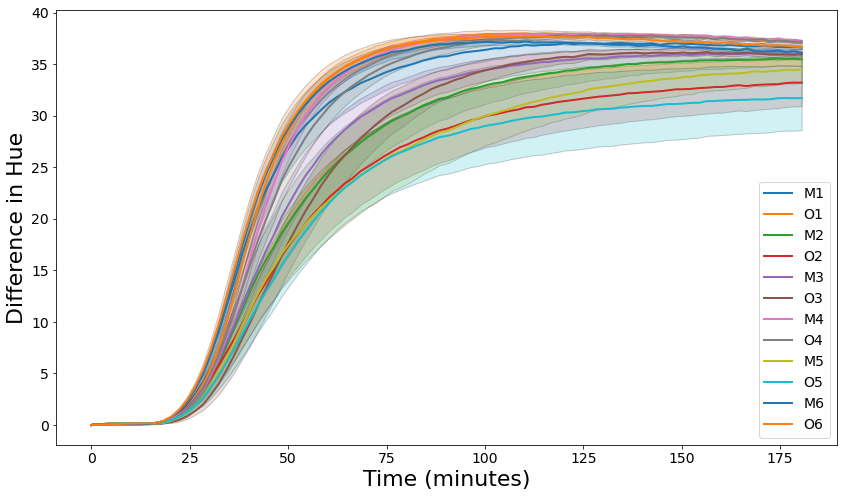

In [9]:
# Now let's make a basic plot.  Set it up, then step through the pruned
#  "experiment list" again, this time grabbing the relevant entries from
# each numpy array to construct a plot from.
# This way the same code can run on an arbitrarily sized spreadsheet. 

fig, ax = plt.subplots(figsize=(14,8))
n=1
for p in pruned:
    ax.errorbar(npavg[0], npavg[n], label=p, linewidth=2)
    plt.fill_between(npavg[0],npavg[n]-nperr[n], npavg[n]+nperr[n], alpha=0.2, edgecolor='000000')
    n=n+1
    
plt.xlabel('Time (minutes)')
plt.ylabel('Difference in Hue')
plt.legend(loc='lower right')



# And for good measure, let's have it spit out a png file...

# plt.savefig("/content/drive/MyDrive/Colab Data/test01.png", dpi=300)

[[0.00000000e+00 3.33333333e-01 2.33333333e+00 ... 1.76500000e+02
  1.78500000e+02 1.80500000e+02]
 [0.00000000e+00 9.23388026e-03 9.24064069e-02 ... 3.11939533e+01
  3.13521082e+01 3.15098056e+01]
 [0.00000000e+00 4.05931990e-03 3.44581328e-03 ... 3.09137098e+01
  3.08189234e+01 3.09122389e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


IndexError: arrays used as indices must be of integer (or boolean) type

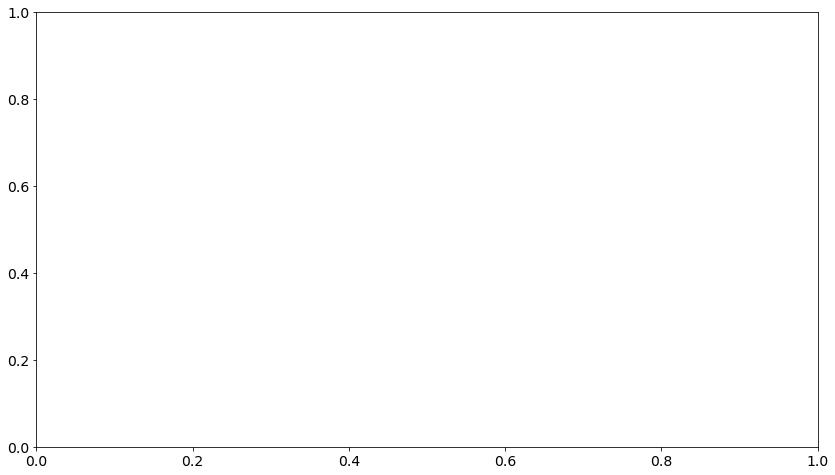

In [11]:
# Now let's make a basic plot.  Set it up, then step through the pruned
#  "experiment list" again, this time grabbing the relevant entries from
# each numpy array to construct a plot from.
# This way the same code can run on an arbitrarily sized spreadsheet. 

fig, ax = plt.subplots(figsize=(14,8))
print(npp3)

n=1
for n in npp3:
    ax.errorbar(npp3[0], npp3[n], linewidth=2)


    
plt.xlabel('Time (minutes)')
plt.ylabel('Difference in Hue')
plt.legend(loc='lower right')



# And for good measure, let's have it spit out a png file...

# plt.savefig("/content/drive/MyDrive/Colab Data/test01.png", dpi=300)

In [28]:
print(param1)
print(param10)

[array([  0.        ,   0.33333333,   2.33333333,   4.33333333,
         6.33333333,   8.33333333,  10.33333333,  12.33333333,
        14.35      ,  16.35      ,  18.35      ,  20.35      ,
        22.35      ,  24.35      ,  26.35      ,  28.35      ,
        30.35      ,  32.36666667,  34.36666667,  36.36666667,
        38.36666667,  40.36666667,  42.36666667,  44.36666667,
        46.36666667,  48.38333333,  50.38333333,  52.38333333,
        54.38333333,  56.38333333,  58.38333333,  60.38333333,
        62.38333333,  64.38333333,  66.38333333,  68.38333333,
        70.4       ,  72.4       ,  74.4       ,  76.4       ,
        78.4       ,  80.4       ,  82.4       ,  84.4       ,
        86.4       ,  88.41666667,  90.41666667,  92.41666667,
        94.41666667,  96.41666667,  98.41666667, 100.41666667,
       102.41666667, 104.41666667, 106.43333333, 108.43333333,
       110.43333333, 112.43333333, 114.43333333, 116.43333333,
       118.43333333, 120.43333333, 122.43333333, 124.4

In [26]:
# setup the plot
#fig, ax = plt.subplots(figsize=(14,8))

# define our function - this is the 6-component fit that should give us info we want.
#def func(x, initialsignal, initialslope, finalsignal, finalslope, transitionslope, transitionmidpoint):
#  observedsignal = ((initialsignal+(initialslope*x))+(finalsignal+(finalslope*x))*np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))/(1+np.exp(-((transitionslope*(transitionmidpoint-x))/2271)))
#  return observedsignal


# define utility functions that will plot 'diagnostic' lines for us separately describing
# the initial, transition, and final regions that we've fit.

#def simplelinear(x, m1, b1):
#  return (m1*x)+b1

# do the curve fit, with some initial guesses for the fit parameters.

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

#p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

#popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

#The parameters optimized are L, x0, k, b, who are initially assigned in p0, the point the optimization starts from.

#L is responsible for scaling the output range from [0,1] to [0,L]
#b adds bias to the output and changes its range from [0,L] to [b,L+b]
#k is responsible for scaling the input, which remains in (-inf,inf)
#x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

# this is an area that could use some work - I'm thinking that looking
# at the first 40 and last 40 data points and doing a simple linear 
# fit to determine the slope and intercept might really help bootstrap
# this fit so it doesn't wind up failing on weird plots.  with sane
# values for four of the components, the slope and midpoint of the
# transition regions should be easy to find without manual intervention.
#pfit, pcov = curve_fit(func, npavg[0], npavg[5], p0=[1,0,166,0,300,40])

# barf out fit results.  this is also a handy reference to what's what.

#print("initial signal: ",pfit[0])
#print("initial slope: ",pfit[1])
#print("final signal: ",pfit[2])
#print("final slope: ",pfit[3])
#print("transition slope: ",pfit[4])
#print("transition midpoint: ",pfit[5])



tmidpointsP1 = []
#For loop that finds the transition midpoint for all 12 replicates from parameter 1
#and assigns them to the tmidpointsP1 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    X = 0
    x = i+1
    #L is responsible for scaling the output range from [0,1] to [0,L]
    #x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].
    #k is responsible for scaling the input, which remains in (-inf,inf)
    #b adds bias to the output and changes its range from [0,L] to [b,L+b]
    pfitP1, pcovP1 = curve_fit(sigmoid, npp1[0], npp1[x], p0=[max(npp1[x]),np.median(npp1[x]),1,0], bounds=(0,40),method='dogbox')
    tmidpointsP1.append(pfitP1[1])
print(tmidpointsP1)
    
tmidpointsP2 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 2
#and assigns them to the tmidpointsP2 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP2, pcovP2 = curve_fit(sigmoid, npp2[0], npp2[x], p0=[max(npp2[x]),np.median(npp2[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP2.append(pfitP2[1])
print(tmidpointsP2)
    
tmidpointsP3 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 3
#and assigns them to the tmidpointsP3 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP3, pcovP3 = curve_fit(sigmoid, npp3[0], npp3[x], p0=[max(npp3[x]),np.median(npp3[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP3.append(pfitP3[1])
print(tmidpointsP3)
    
tmidpointsP4 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 4
#and assigns them to the tmidpointsP4 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP4, pcovP4 = curve_fit(sigmoid, npp4[0], npp4[x], p0=[max(npp4[x]),np.median(npp4[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP4.append(pfitP4[1])
print(tmidpointsP4)

tmidpointsP5 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 5
#and assigns them to the tmidpointsP5 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP5, pcovP5 = curve_fit(sigmoid, npp5[0], npp2[x], p0=[max(npp5[x]),np.median(npp5[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP5.append(pfitP5[1])
print(tmidpointsP5)

tmidpointsP6 = []
#For loop that finds the transition midpoint for all 12 replicates from parameter 1
#and assigns them to the tmidpointsP1 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP6, pcovP6 = curve_fit(sigmoid, npp6[0], npp6[x], p0=[max(npp6[x]),np.median(npp6[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP6.append(pfitP6[1])
print(tmidpointsP6)

tmidpointsP7 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 2
#and assigns them to the tmidpointsP2 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP7, pcovP7 = curve_fit(sigmoid, npp7[0], npp7[x], p0=[max(npp7[x]),np.median(npp7[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP7.append(pfitP7[1])
print(tmidpointsP7)
    
tmidpointsP8 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 3
#and assigns them to the tmidpointsP3 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP8, pcovP8 = curve_fit(sigmoid, npp8[0], npp8[x], p0=[max(npp8[x]),np.median(npp8[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP8.append(pfitP8[1])
print(tmidpointsP8)
    
tmidpointsP9 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 4
#and assigns them to the tmidpointsP4 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP9, pcovP9 = curve_fit(sigmoid, npp9[0], npp9[x], p0=[max(npp9[x]),np.median(npp9[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP9.append(pfitP9[1])
print(tmidpointsP9)

tmidpointsP10 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 5
#and assigns them to the tmidpointsP5 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP10, pcovP10 = curve_fit(sigmoid, npp10[0], npp10[x], p0=[max(npp10[x]),np.median(npp10[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP10.append(pfitP10[1])
print(tmidpointsP10)
    
tmidpointsP11 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 5
#and assigns them to the tmidpointsP5 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP11, pcovP11 = curve_fit(sigmoid, npp11[0], npp11[x], p0=[max(npp11[x]),np.median(npp11[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP11.append(pfitP11[1])
print(tmidpointsP11)
    
tmidpointsP12 = []
#For loop that finds the transition midpoint for all 8 sets of data that coincide with parameter 5
#and assigns them to the tmidpointsP5 array
for i in range(12):
    #Sets x to one greater than i so it doesn't try to calculate the curve fit for time compared to itself
    x = i+1
    pfitP12, pcovP12 = curve_fit(sigmoid, npp12[0], npp12[x], p0=[max(npp12[x]),np.median(npp12[x]),1,0], bounds=(0,40), method='dogbox')
    tmidpointsP12.append(pfitP12[1])
print(tmidpointsP12)
    
# with the fit values now established, calcuate the y-intercept of the
# transition-region line so that we can plot it separately later.

#midint = -(pfit[4] * pfit[5] - func(pfit[5],*pfit))

# set the limits of the plot to the max and min values of the data in the array
# this is because otherwise it will try to get the whole transition line on the 
# plot and that one usually has a bananas y-intercept.

#plt.ylim(np.amin(npavg[1]),np.amax(npavg[1]))

# plot the source data

#skipafewx=np.asarray(npavg[0])
#skipafewy=np.asarray(npavg[1])

#plt.plot(skipafewx[::3], skipafewy[::3], lw=1, marker='^', markersize=12, label='data')

# plot the fit

#plt.plot(npavg[0], sigmoid(npavg[0], *pfit), lw=2, ls=":", label='fit')

# throw up three more lines, one for the initial baseline, 
# one for the transition region, one for the final baseline
#pFit[0] = L is responsible for scaling the output range from [0,1] to [0,L]
#pFit[1] = b adds bias to the output and changes its range from [0,L] to [b,L+b]
#pFit[2] = k is responsible for scaling the input, which remains in (-inf,inf)
#pFit[3] = x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

#plt.plot(npavg[0], simplelinear(npavg[0], pfit[1], pfit[0]), lw=4, alpha=0.2, label='initial region')
#plt.plot(npavg[0], simplelinear(npavg[0], pfit[4], midint), lw=4, alpha=0.2, label='transition region')
#plt.plot(npavg[0], simplelinear(npavg[0], pfit[3], pfit[2]), lw=4, alpha=0.2, label='final region')
    
# finish marking up the plot
#plottitle = "Let's get curve-fitting and data extraction running"
#plt.xlabel('Time (minutes)')
#plt.ylabel('Sensor Response (Abs @ 615nm)')
#plt.title(plottitle, fontsize=20, pad=20)
#plt.legend(loc='upper left')

# And for good measure, let's have it spit out a png file...
# savepath = setup_path + "optional-output.png"
# plt.savefig(savepath, dpi=300)

[40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 39.24096407369448, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 40.0, 40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 39.24096496028235, 37.914748207163974, 34.53075441092027, 36.96446738150749, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[39.57043074998586, 40.0, 40.0, 40.0, 38.70097961274469, 37.87533398727608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 36.95919278708536, 40.0, 40.0, 40.0, 38.020997930127955, 39.893691924665944, 40.0, 0.0, 0.0, 0.0, 0.0]
[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 38.13809772942271, 39.921028351007294, 40.0, 0.0, 0.0, 0.0]


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [130]:
#Sets tmidpoints to have the transition midpoints of all the parameters
tmidpoints = [tmidpointsP1, tmidpointsP2, tmidpointsP3, tmidpointsP4, tmidpointsP5, tmidpointsP6, tmidpointsP7, tmidpointsP8, tmidpointsP9, tmidpointsP10, tmidpointsP11, tmidpointsP12]

transition_midpoints = []

#Calculates the transition midpoints of each parameter using all that parameters data,
#rather than getting the midpoints for each column of each parameter
for i in range(len(tmidpoints)):
    #Sets x to 1 greater than i so that it doesn't try to calculate the curve fit for time compared to itself
    x = i + 1
    #Calculates the curve fit
    pfit, pcov = curve_fit(sigmoid, npavg[0], npavg[x], p0=[max(npavg[x]),np.median(npavg[x]),max(npavg[x])-min(npavg[x]),max(npavg[x])+min(npavg[x])], method='dogbox')
    
    transition_midpoints.append(pfit[1])
    
#Prints out the transition midpoints of each parameter
print(transition_midpoints)

[46.35218398772916, 37.255400228491, 67.23671176207851, -4.55689808493101, 33.512518000980606, -3.157677651984841, 37.25791653029185, 13.548286121225992, 28.418077975021365, 64.35547364269911, 36.37976645277013, -0.8922446414990048]


<ipython-input-129-7e996b973c85>:19: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


1.197999351061885
34.398248756032785


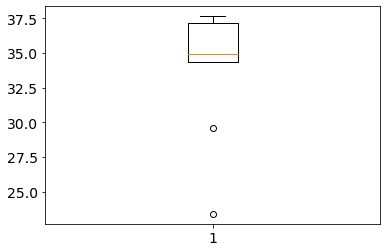

In [131]:
#Calculates than prints the standard error of the mean of the transition midpoints for parameter 1
std_err_mean = sem(tmidpointsP1)
print(std_err_mean)

#Calculates than prints the mean of the transition midpoints for parameter 1
midpoint_mean = statistics.mean(tmidpointsP1)
print(midpoint_mean)

#Plots a boxplot using parameter 1's transition midpoints
plt.boxplot(tmidpointsP1, positions=[1])

#Displays the boxplot
plt.show()

0.9222600385282771
37.405679181716565


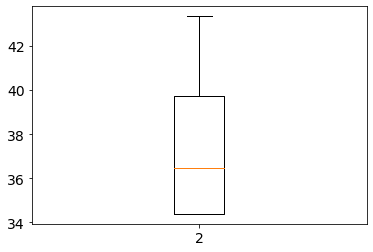

In [132]:
#Calculates than prints the standard error of the mean of the transition midpoints for parameter 2
std_err_mean = sem(tmidpointsP2)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 2
midpoint_mean = statistics.mean(tmidpointsP2)
print(midpoint_mean)

#Plots a boxplot using parameter 2's transition midpoints
plt.boxplot(tmidpointsP2, positions=[2])

#Displays the boxplot
plt.show()

3.642880144368364
41.81125823832268


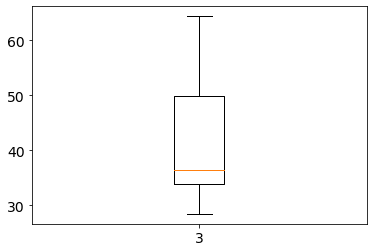

In [133]:
#Calculates and prints the standard error of the mean of the transition midpoints for parameter 3
std_err_mean = sem(tmidpointsP3)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 3
midpoint_mean = statistics.mean(tmidpointsP3)
print(midpoint_mean)

#Plots a boxplot using parameter 3's transition midpoints
plt.boxplot(tmidpointsP3, positions=[3])

#Displays the boxplot
plt.show()

9.648239250259294
50.416447957737745


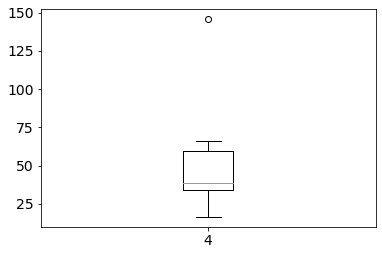

In [134]:
#Calculates and prints the standard error of the mean of the transition midpoints for parameter 4
std_err_mean = sem(tmidpointsP4)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 4
midpoint_mean = statistics.mean(tmidpointsP4)
print(midpoint_mean)

#Plots a boxplot using parameter 4's transition midpoints
plt.boxplot(tmidpointsP4, positions=[4])

#Displays the boxplot
plt.show()

1.737943676685677
37.81629485883666


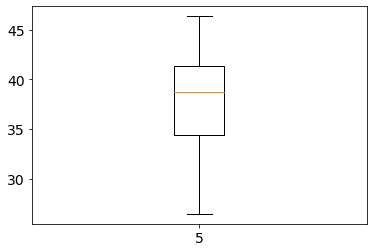

In [135]:
#Calculates and prints the standard error of the mean of the transition midpoints for parameter 5
std_err_mean = sem(tmidpointsP5)
print(std_err_mean)

#Calculates and prints the mean of the transition midpoints for parameter 5
midpoint_mean = statistics.mean(tmidpointsP5)
print(midpoint_mean)

#Plots a boxplot using parameter 5's transition midpoints
plt.boxplot(tmidpointsP5, positions=[5])

#Displays the boxplot
plt.show()

TypeError: positions should be an iterable of numbers

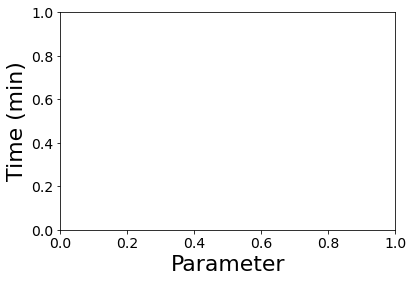

In [141]:
#Set up the plot
fig, ax = plt.subplots()

#Sets the axis labels
plt.xlabel('Parameter')
plt.ylabel('Time (min)')

#Plot the boxplot
VP = ax.boxplot(tmidpoints, positions=pruned, widths=0.5, patch_artist=True,
                showmeans=False, showfliers=True,
                medianprops={"color": "black", "linewidth": 0.75},
                boxprops={"facecolor": "C7", "edgecolor": "black",
                          "linewidth": 0.5},
                whiskerprops={"color": "black", "linewidth": 1.5},
                capprops={"color": "black", "linewidth": 1.5})

#Set axis limits
ax.set(xlim=(0, 6), xticks=np.arange(1, 6),
       ylim=(11, 38), yticks=np.arange(12, 37, 2))

#Displays the boxplot
plt.show()